In [1]:
import scipy.stats as stats
from scipy.stats import wilcoxon, kruskal
import scikit_posthocs as sp
import pandas as pd
import xlrd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scikit_posthocs import posthoc_dunn
import numpy as np

In [2]:
test_results = pd.read_excel("C:\\Users\\MERVE EKİZ\\Downloads\\wandb_test_results_for_turkish.xlsx")

In [3]:
test_results.head()

,model,question_num,user_input,context_recall,non_llm_context_precision_with_reference,factual_correctness,faithfulness,semantic_similarity
0,model1,question1,ODTÃœ HAT nedir ve ne zaman kuruldu?,0.0,0.333333,0.13,0.181818,0.877565
1,model1,question2,ODTÃœ kulÃ¼bÃ¼ ve faaliyetleri hakkÄ±nda daha ...,0.0,0.000000,0.00,0.714286,0.909921
2,model1,question3,YKS KayÄ±t ProgramÄ± kullanarak yurt baÅŸvurus...,0.0,0.000000,0.00,0.111111,0.837286
3,model1,question4,ARKEOLOJÄ° DERNEÄÄ° nerede toplanÄ±yor?,0.0,0.000000,0.00,0.571429,0.860451
4,model1,question5,GÃœZEL SANATLAR DERNEÄÄ°'nin amacÄ± nedir?,0.0,0.000000,0.00,0.000000,0.917455


In [4]:
# define metrics 
all_metrics = [
    "context_recall",
    "non_llm_context_precision_with_reference",
    "factual_correctness",
    "faithfulness",
    "semantic_similarity",
]

In [5]:
# group data for each model
grouped_data = test_results.groupby("model")

### Kruskal-Wallis Test

In [8]:
kruskal_results = {}
for metric in all_metrics:
    data_per_model = [group[metric].dropna().values for name, group in grouped_data]
    kruskal_results[metric] = kruskal(*data_per_model)

In [9]:
kruskal_results

{'context_recall': KruskalResult(statistic=np.float64(76.23146729660479), pvalue=np.float64(9.024128822424199e-13)),
 'non_llm_context_precision_with_reference': KruskalResult(statistic=np.float64(48.207700592043956), pvalue=np.float64(2.3356306731075324e-07)),
 'factual_correctness': KruskalResult(statistic=np.float64(27.723979389896826), pvalue=np.float64(0.001060585180832656)),
 'faithfulness': KruskalResult(statistic=np.float64(21.682176855089544), pvalue=np.float64(0.009942708218346221)),
 'semantic_similarity': KruskalResult(statistic=np.float64(34.52445520975925), pvalue=np.float64(7.225714652362526e-05))}

Kruskal - Wallis Test Results:
As it is seen from the code above, all metrics have a significant difference among models because the p-value is less than 0.05 for each metric. 

1. Semantic Similarity: 
p<0.05
Significant differences exist among models.
2. Factual Correctness: 
p<0.05
Significant differences exist among models.
3. Context Recall:  
p<0.05
Significant differences exist among models.
4. Non-LLM Context Precision with Reference:
p<0.05
Significant differences exist among models.
5. Faithfulness:
p<0.05
Significant differences exist among models.


#### Dunn's Test to compare all pairwise differences between groups

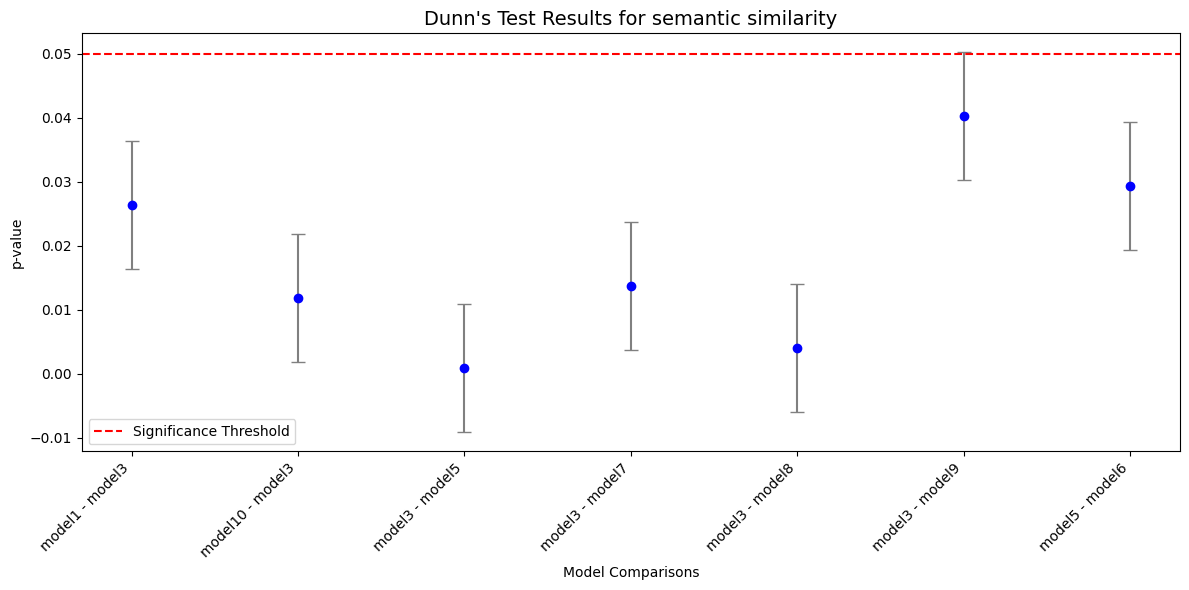

In [11]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="semantic_similarity", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs1 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs1):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for semantic similarity", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

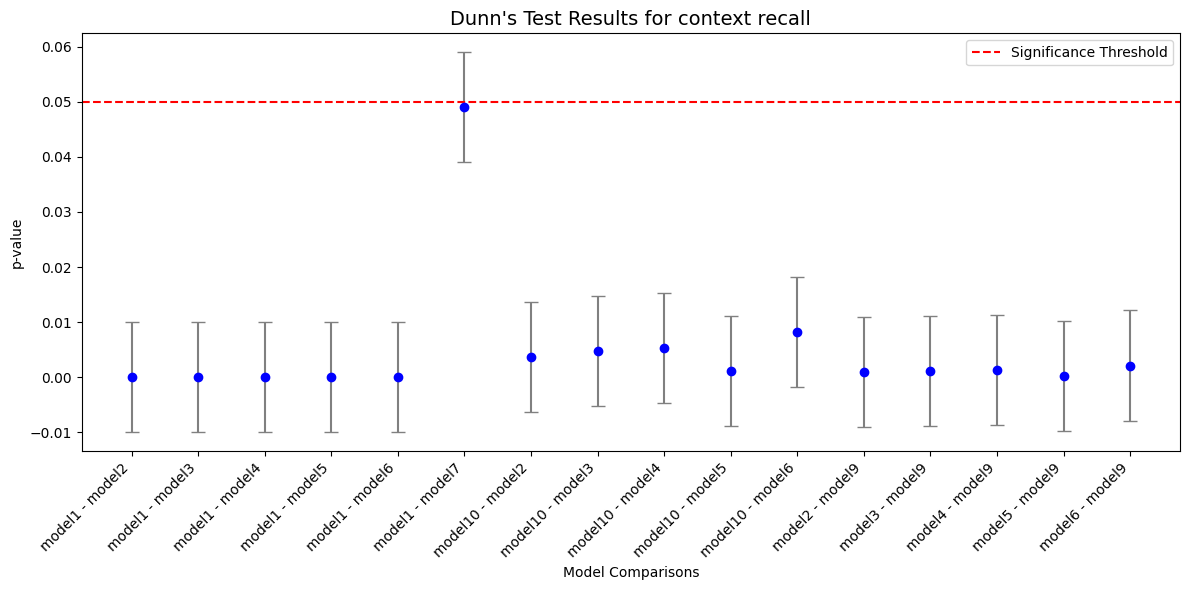

In [12]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="context_recall", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs2 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs2):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for context recall", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

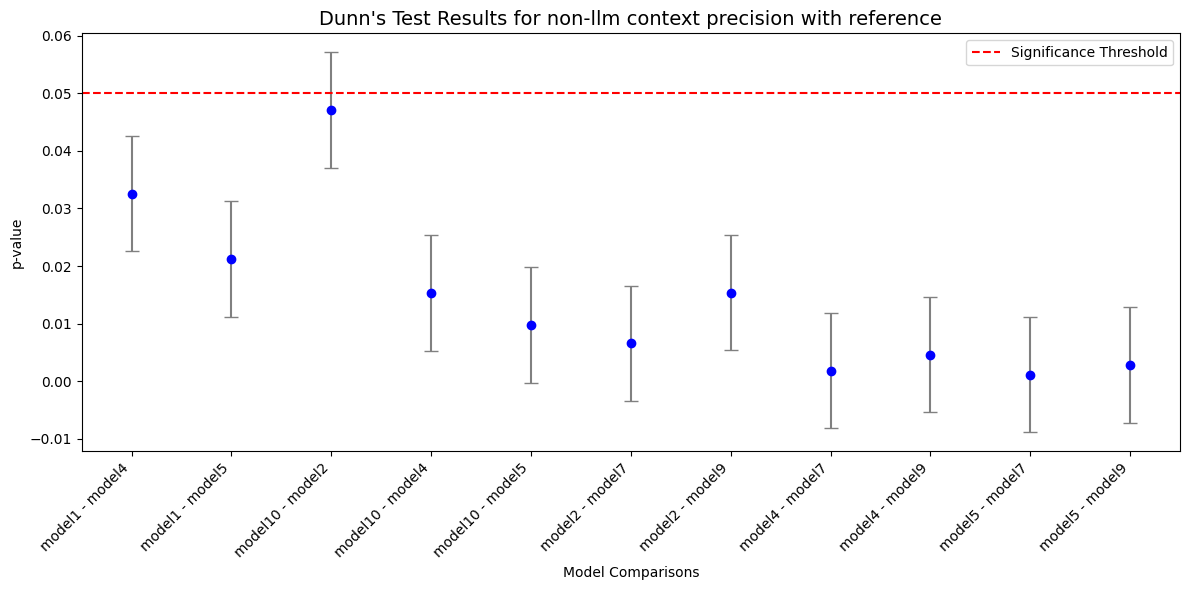

In [13]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="non_llm_context_precision_with_reference", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs3 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs3):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for non-llm context precision with reference", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

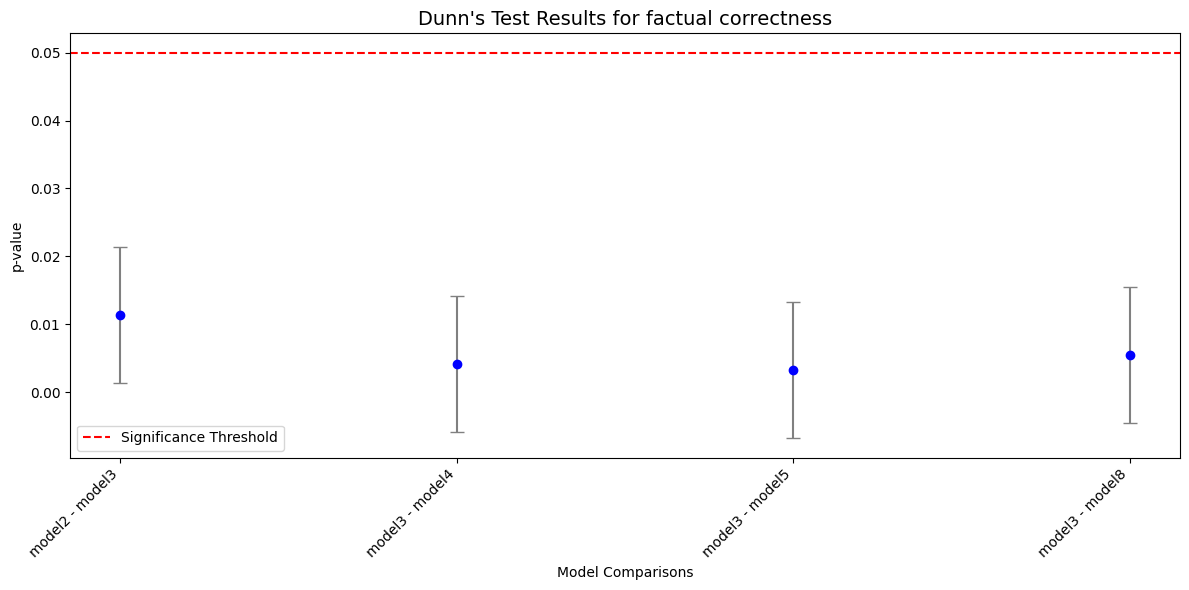

In [14]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="factual_correctness", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs4 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs4):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for factual correctness", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

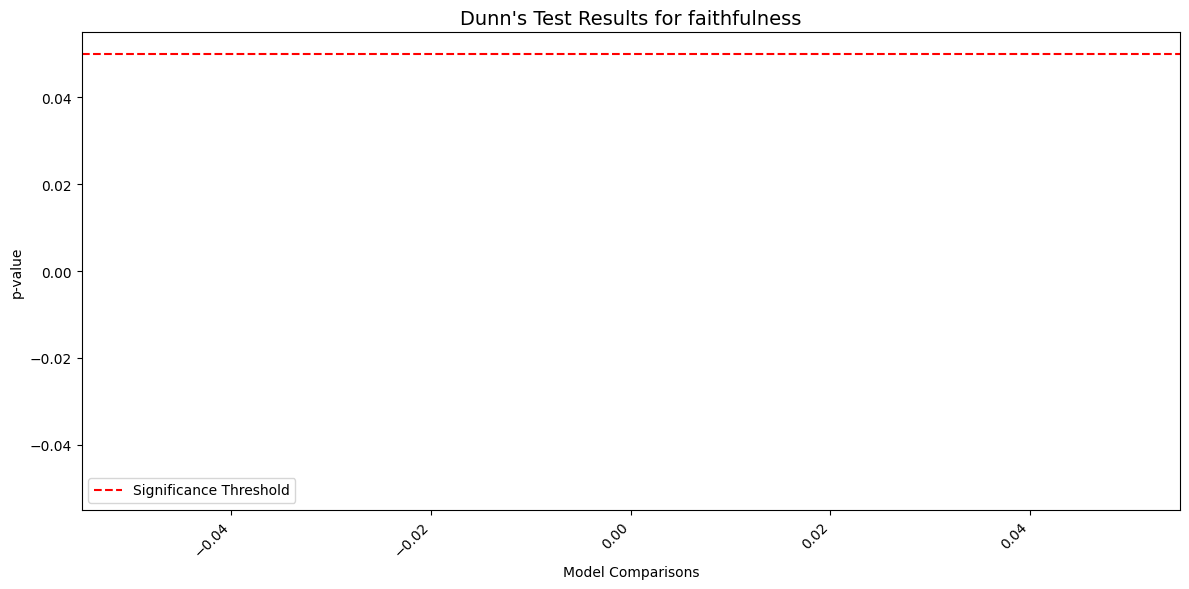

In [21]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="faithfulness", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs5 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs5):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.05)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for faithfulness", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

according to dunn's test results, there is no significant difference between groups for faithfulness metric.

### One-sided Wilcoxon signed-rank test to find the statistically higher performance

Semantic similarity

In [22]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "semantic_similarity"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "semantic_similarity"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "semantic_similarity"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test 
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model1', 'model2', np.float64(1532.0), np.float64(0.04511299001248393)),
 ('model1', 'model3', np.float64(1963.0), np.float64(1.2406297494944142e-05)),
 ('model1', 'model6', np.float64(1785.0), np.float64(0.0007496756012697301)),
 ('model1', 'model9', np.float64(1561.0), np.float64(0.031166458232960846)),
 ('model2', 'model3', np.float64(1770.0), np.float64(0.001010848431785074)),
 ('model4', 'model6', np.float64(1617.0), np.float64(0.014202669216184871)),
 ('model5', 'model6', np.float64(1915.0), np.float64(4.1495791203037855e-05))]

In [23]:
mean_metric = (
    test_results.groupby("model")["semantic_similarity"].mean().sort_values(ascending=False)
)

mean_metric

model
model5     0.900289
model8     0.898745
model10    0.896828
model7     0.896657
model1     0.895184
model9     0.894681
model4     0.886793
model2     0.869259
model6     0.867387
model3     0.830150
Name: semantic_similarity, dtype: float64

Context Recall

In [24]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "context_recall"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "context_recall"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "context_recall"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model2', 'model7', np.float64(357.5), np.float64(0.01477525931312933)),
 ('model2', 'model8', np.float64(411.0), np.float64(0.008042366969322739)),
 ('model2', 'model9', np.float64(587.5), np.float64(2.4696334228085623e-06)),
 ('model2', 'model10', np.float64(713.5), np.float64(1.717337789935337e-05)),
 ('model3', 'model7', np.float64(421.0), np.float64(0.015195380968004733)),
 ('model3', 'model8', np.float64(471.5), np.float64(0.004356887795249423)),
 ('model3', 'model9', np.float64(813.5), np.float64(1.3245732320073934e-05)),
 ('model3', 'model10', np.float64(744.5), np.float64(1.9604531484838806e-05)),
 ('model4', 'model7', np.float64(394.5), np.float64(0.019136727437755296)),
 ('model4', 'model8', np.float64(453.0), np.float64(0.003464188988910411)),
 ('model4', 'model9', np.float64(707.5), np.float64(2.1118656838114027e-05)),
 ('model4', 'model10', np.float64(854.5), np.float64(5.653740196765785e-05)),
 ('model5', 'model7', np.float64(563.5), np.float64(0.03809000740915199)),
 

In [25]:
mean_metric = (
    test_results.groupby("model")["context_recall"].mean().sort_values(ascending=False)
)

mean_metric

model
model5     0.656293
model3     0.632143
model2     0.630782
model4     0.628061
model6     0.619048
model7     0.489773
model8     0.444420
model10    0.326769
model9     0.302721
model1     0.230004
Name: context_recall, dtype: float64

Non-LLM Context Precision With Reference

In [26]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "non_llm_context_precision_with_reference"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "non_llm_context_precision_with_reference"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "non_llm_context_precision_with_reference"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model2', 'model6', np.float64(183.5), np.float64(0.00885149689073538)),
 ('model2', 'model7', np.float64(139.0), np.float64(0.0014814474120476778)),
 ('model2', 'model9', np.float64(156.0), np.float64(0.0010293003747090723)),
 ('model2', 'model10', np.float64(105.0), np.float64(0.0004823113094284696)),
 ('model3', 'model6', np.float64(90.5), np.float64(0.04111432438210036)),
 ('model3', 'model7', np.float64(58.0), np.float64(0.011064573844522778)),
 ('model3', 'model9', np.float64(71.0), np.float64(0.005451642374001699)),
 ('model3', 'model10', np.float64(42.0), np.float64(0.009666046217937417)),
 ('model4', 'model6', np.float64(178.0), np.float64(0.0031502595489776926)),
 ('model4', 'model7', np.float64(144.0), np.float64(0.0006062729722281286)),
 ('model4', 'model8', np.float64(142.0), np.float64(0.028064506754459664)),
 ('model4', 'model9', np.float64(146.5), np.float64(0.00039161135667564485)),
 ('model4', 'model10', np.float64(130.0), np.float64(0.0006241864609269017)),
 ('mode

In [27]:
mean_metric = (
    test_results.groupby("model")["non_llm_context_precision_with_reference"].mean().sort_values(ascending=False)
)

mean_metric

model
model5     0.185000
model4     0.155357
model2     0.126961
model3     0.105952
model8     0.067857
model6     0.049065
model10    0.033333
model1     0.026190
model7     0.014286
model9     0.010714
Name: non_llm_context_precision_with_reference, dtype: float64

Factual Correctness

In [29]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "factual_correctness"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "factual_correctness"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "factual_correctness"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model1', 'model3', np.float64(804.0), np.float64(0.005543146776825336)),
 ('model2', 'model3', np.float64(933.5), np.float64(8.77569802097962e-06)),
 ('model2', 'model6', np.float64(795.0), np.float64(0.03472232420858041)),
 ('model4', 'model6', np.float64(741.0), np.float64(0.030514996131738473)),
 ('model5', 'model6', np.float64(952.5), np.float64(0.01793658146872497)),
 ('model5', 'model9', np.float64(1110.5), np.float64(0.04436216836161114)),
 ('model8', 'model9', np.float64(957.0), np.float64(0.016256873787027656))]

In [30]:
mean_metric = (
    test_results.groupby("model")["factual_correctness"].mean().sort_values(ascending=False)
)

mean_metric

model
model2     0.253030
model4     0.250580
model5     0.249275
model8     0.236000
model7     0.209286
model10    0.195143
model1     0.175797
model9     0.173286
model6     0.172029
model3     0.098841
Name: factual_correctness, dtype: float64

Faithfulness

In [31]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "faithfulness"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "faithfulness"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "faithfulness"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model2', 'model3', np.float64(893.5), np.float64(0.03127314746047385)),
 ('model2', 'model8', np.float64(951.5), np.float64(0.003422069789265055)),
 ('model2', 'model9', np.float64(1048.0), np.float64(0.0016203475790634617)),
 ('model2', 'model10', np.float64(916.5), np.float64(0.008739805286050893)),
 ('model4', 'model8', np.float64(1137.0), np.float64(0.0028417397332954025)),
 ('model4', 'model9', np.float64(1165.5), np.float64(0.00013512004677637246)),
 ('model4', 'model10', np.float64(1129.0), np.float64(0.0081186120441715)),
 ('model5', 'model8', np.float64(1100.5), np.float64(0.0028085949376024065)),
 ('model5', 'model9', np.float64(1093.5), np.float64(0.0012536766774316783)),
 ('model5', 'model10', np.float64(991.5), np.float64(0.01601350164385013)),
 ('model6', 'model8', np.float64(792.5), np.float64(0.036681290838974624)),
 ('model6', 'model9', np.float64(873.0), np.float64(0.024493871487250195)),
 ('model7', 'model8', np.float64(906.0), np.float64(0.04582818610842558)),
 (

In [32]:
mean_metric = (
    test_results.groupby("model")["faithfulness"].mean().sort_values(ascending=False)
)

mean_metric

model
model2     0.393942
model4     0.370197
model5     0.363733
model6     0.309477
model7     0.302489
model3     0.280197
model1     0.248418
model10    0.237465
model8     0.222470
model9     0.193933
Name: faithfulness, dtype: float64